<a href="https://colab.research.google.com/github/AishaKanwal/LGMVIP-DataScience/blob/main/Task6-GlobalTerrorism-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore - VirtualInternshipProgram - LGMVIP | DataScienceInternship**
> **Task 6 - Exploratory Data Analysis on Global Terrorism**

> **Aisha Kanwal | Internee**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [ ]:
url = '/content/drive/MyDrive/ColabNotebooks/globalterrorism.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

<ipython-input-4-0f33655d32e1>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, encoding='ISO-8859-1')


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Columns names

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Rename column names

In [ ]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'gname':'Group', 'country_txt':'Country', 
                   'region_txt':'Region', 'latitude': 'Latitude','longitude':'Longitude', 'summary':'Summary',
                   'attacktype1_txt':'AttackType', 'targtype1_txt':'TargetType', 'nkill':'Kill', 'nwound':'Wound'}, inplace=True)

In [ ]:
df = df[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'Latitude', 'Longitude', 'AttackType', 'Kill',
          'TargetType', 'Summary', 'Group', 'Wound', 'motive']]

In [ ]:
df.head(5)

,Year,Month,Day,Country,Region,city,Latitude,Longitude,AttackType,Kill,TargetType,Summary,Group,Wound,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,Private Citizens & Property,NaN,MANO-D,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,Government (Diplomatic),NaN,23rd of September Communist League,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,Journalists & Media,NaN,Unknown,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN


### check null values

In [ ]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             434
Latitude        4556
Longitude       4557
AttackType         0
Kill           10313
TargetType         0
Summary        66129
Group              0
Wound          16311
motive        131130
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   city        181257 non-null  object 
 6   Latitude    177135 non-null  float64
 7   Longitude   177134 non-null  float64
 8   AttackType  181691 non-null  object 
 9   Kill        171378 non-null  float64
 10  TargetType  181691 non-null  object 
 11  Summary     115562 non-null  object 
 12  Group       181691 non-null  object 
 13  Wound       165380 non-null  float64
 14  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 20.8+ MB


### destructive feature of data

In [ ]:
print("Country in which the most attacks happend:",df['Country'].value_counts().idxmax())
print("City in which the most attacks happend:",df['city'].value_counts().index[1]) 
print("Region in which the most attacks happend:",df['Region'].value_counts().idxmax())
print("Year in which the most attacks happend:",df['Year'].value_counts().idxmax())
print("Month in which the most attacks happend:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country in which the most attacks happend: Iraq
City in which the most attacks happend: Baghdad
Region in which the most attacks happend: Middle East & North Africa
Year in which the most attacks happend: 2014
Month in which the most attacks happend: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [ ]:
df.shape

(181691, 15)

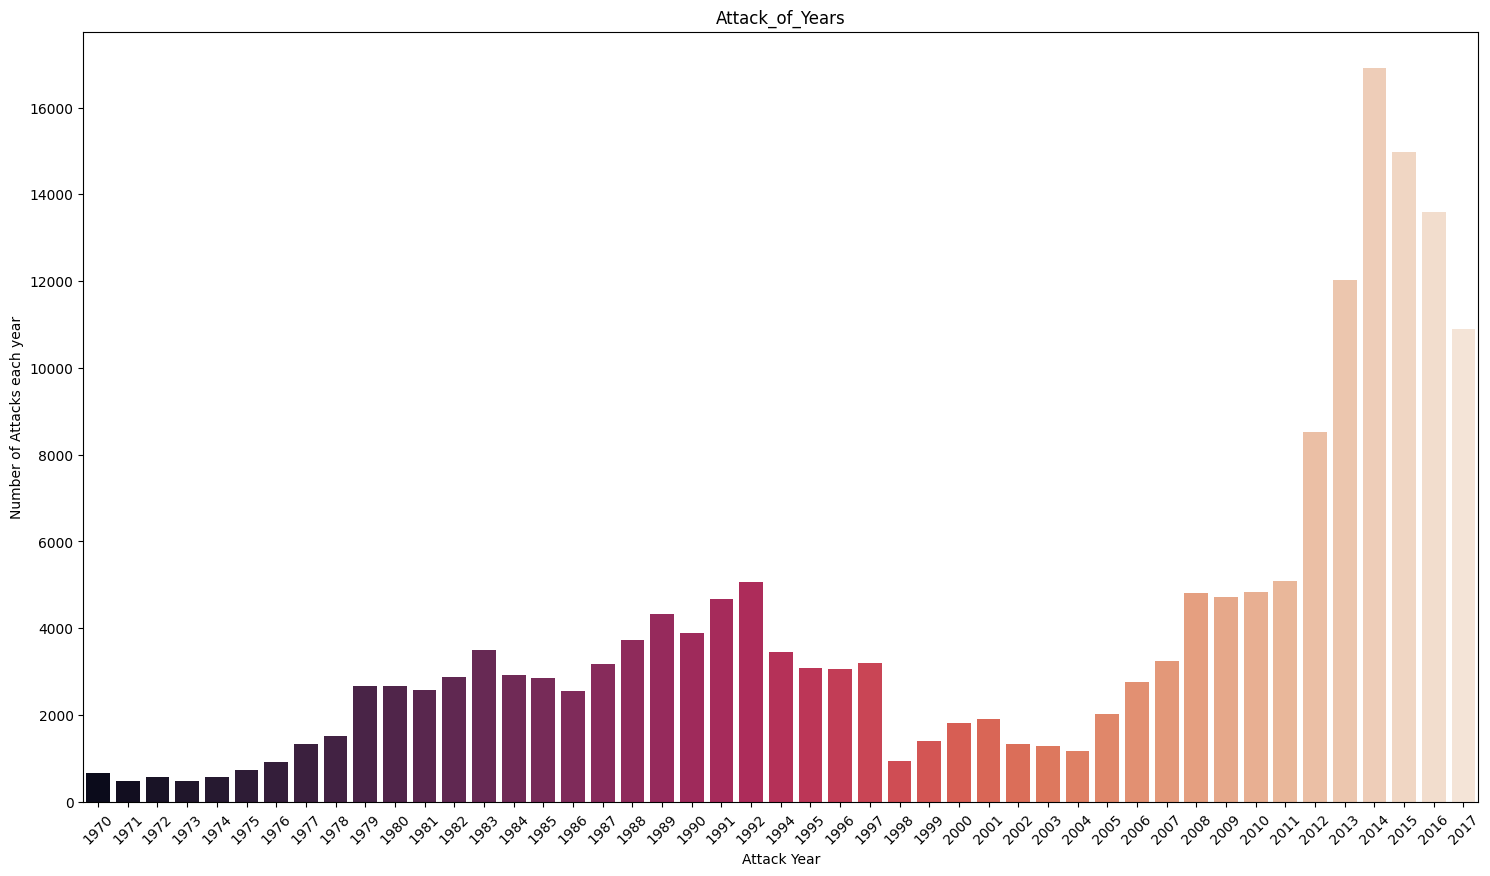

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

## The most of the terror attacks carried out in year 2014 and then 2015

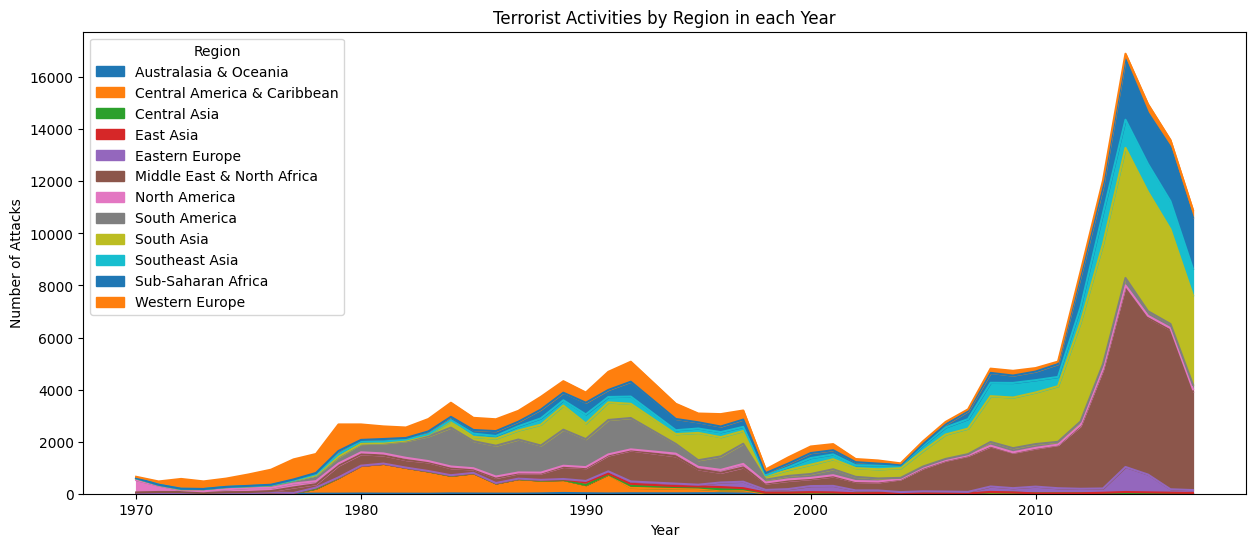

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
df['Wound'] = df['Wound'].fillna(0).astype(int)
df['Kill'] = df['Kill'].fillna(0).astype(int)
df['casualities'] = df['Kill'] + df['Wound']

In [ ]:
df.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

## Top 10 countries affected by terror attacks

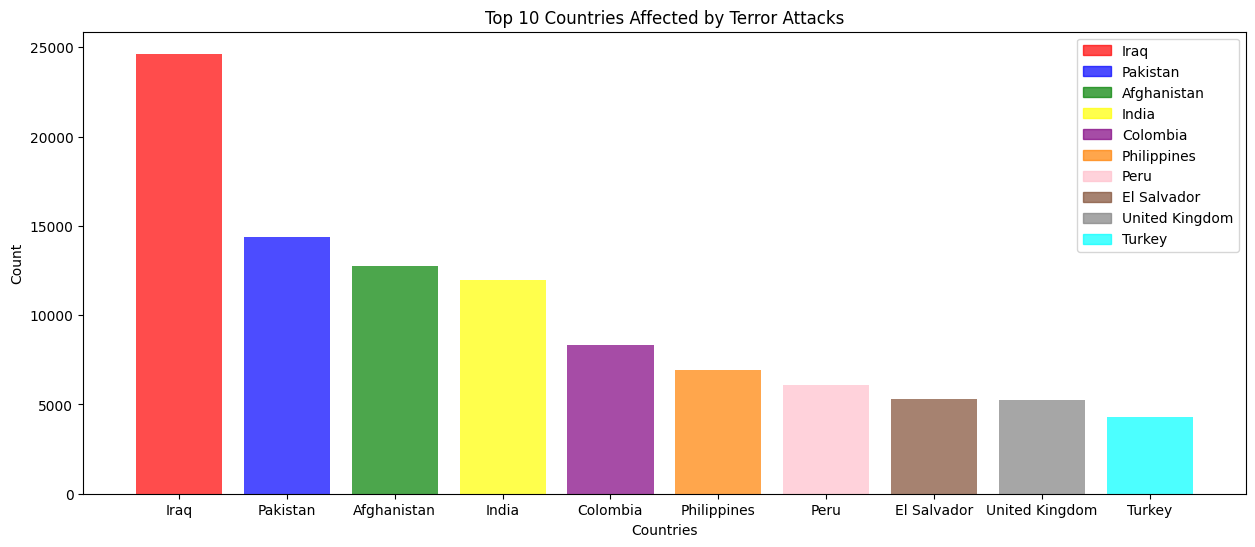

In [ ]:
# plt.subplots(figsize=(15,6))
# # colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
# colors = [(1, 0, 0, 0.7), (0, 0, 1, 0.7), (0, 0.5, 0, 0.7), (1, 1, 0, 0.7), (0.5, 0, 0.5, 0.7), 
#           (1, 0.5, 0, 0.7), (1, 0.75, 0.8, 0.7), (0.5, 0.3, 0.2, 0.7), (0.5, 0.5, 0.5, 0.7), (0, 1, 1, 0.7)]
# plt.bar(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values, color=colors)
# plt.title('Top 10 Countries Affected by Terror Attacks')
# plt.xlabel('Countries')
# plt.ylabel('Count')
# plt.xticks(rotation= 90)
# plt.show()


plt.subplots(figsize=(15,6))
colors = [(1, 0, 0, 0.7), 
          (0, 0, 1, 0.7), 
          (0, 0.5, 0, 0.7), 
          (1, 1, 0, 0.7), 
          (0.5, 0, 0.5, 0.7), 
          (1, 0.5, 0, 0.7), 
          (1, 0.75, 0.8, 0.7), 
          (0.5, 0.3, 0.2, 0.7), 
          (0.5, 0.5, 0.5, 0.7), 
          (0, 1, 1, 0.7)]
plt.bar(df['Country'].value_counts()[:10].index,
        df['Country'].value_counts()[:10].values, 
        color=colors)
plt.title('Top 10 Countries Affected by Terror Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 0)

# Define the legend labels and colors
legend_labels = df['Country'].value_counts()[:10].index
legend_colors = colors

# Create the legend
legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
plt.legend(legend_patches, legend_labels, loc='upper right')

plt.show()

## Iraq, Pakistan, and Afghanistan are the most affected countries by terror attacks.

In [ ]:
import folium
from folium.plugins import MarkerCluster 

filterYear = df['Year'] == 1970
filterData = df[filterYear] # filter data
reqFilterData = filterData.loc[:,'city':'Longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

# Count the number of occurrences of each location
location_counts = reqFilterData['city'].value_counts()

# Get the location with the highest count
most_common_location = location_counts.idxmax()

# Create the map centered on the most common location
map = folium.Map(location=[reqFilterData[reqFilterData['city']==most_common_location]['Latitude'].values[0],
                            reqFilterData[reqFilterData['city']==most_common_location]['Longitude'].values[0]],
                 tiles='CartoDB positron', zoom_start=8)

# Add a circle marker with a red fill color and a large radius around the most common location
folium.CircleMarker(location=[reqFilterData[reqFilterData['city']==most_common_location]['Latitude'].values[0],
                              reqFilterData[reqFilterData['city']==most_common_location]['Longitude'].values[0]],
                    radius=100, # set the radius of the circle marker
                    color='#ff0000', # set the border color of the circle marker
                    fill=True, # set the fill color of the circle marker
                    fill_color='#ff0000', # set the fill color of the circle marker
                    opacity=0.6, # set the opacity of the circle marker
                    fill_opacity=0.3, # set the fill opacity of the circle marker
                    ).add_to(map)

# Add a marker for each location in the filtered data
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)

# Display the map
map


**NewYork City is the most attacked area by terrors in 1970 - highlighted in red circle**

## Lets check which terrorist organization have carried out their operations in each country

In [ ]:
terr_org = df.Group.value_counts()[1:10]
terr_org

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

In [ ]:
# Group the data by country, attack group, and year, and count the attacks in each group
grouped = df.groupby(['Country', 'Group', 'Year']).size().reset_index(name='Count')

# Find the row with the highest count for each country and attack group in each year
max_counts = grouped.groupby(['Country', 'Group', 'Year'])['Count'].max().reset_index()

# Merge the two dataframes to get the year with the highest count for each country and attack group
result = pd.merge(grouped, max_counts, on=['Country', 'Group', 'Year', 'Count'], how='inner')

# Print the result
result = result.drop_duplicates(['Country', 'Group'])[['Country', 'Group', 'Year', 'Count']]
result


,Country,Group,Year,Count
0,Afghanistan,Afghan Guerrillas,1991,6
2,Afghanistan,Afghan Mujahideen,1987,1
5,Afghanistan,Afghan Rebels,1988,2
6,Afghanistan,Al-Fatah,2009,1
7,Afghanistan,Al-Qaida,2002,7
...,...,...,...,...
14122,Zimbabwe,South African guerrillas,1987,1
14123,Zimbabwe,Supporters of Joshua Nkomo,1982,5
14125,Zimbabwe,Unknown,1980,13
14143,Zimbabwe,Zimbabwe African Nationalist Union (ZANU),1980,1


## Above mentioned table shows which group in which country have carried most to least terror attacks in each year. 

### Let's see how many people are killed in the terror attack

In [ ]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Kill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [ ]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Kill
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Kill', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297,24920,157321,3642,3718,4478,24231,880,32381


## Most of the people are killed by Armed Assault and Bombing/Explosion

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Kill', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


## Afghanistan is the country in which the most people killed by terror attacks

## Exploratory Data Analysis Summary

1.   Most of the attacks were attacked through firearms and then through explosives
2.   Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.
1.   Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.
2.   Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
1.   The Middle East & North Africa leads 1st among all the regions and then South Asia takes 2nd place



# Task 6 - Exploratory Data Analysis on Global Terrorism
**Done by Aisha Kanwal**